# El sistema astronómico de magnitudes y colores

**Objetivos:** 
* Calcular la longitud de onda efectiva y equivalente, teniendo en cuenta la sensibilidad de un determinado filtro y el flujo emitido por una determinada fuente.
* Graficar la sensibilidad de un sistema de filtros.
* Calcular los colores instrumentales a partir de una fuente de energía.

In [1]:
import pandas as pd
data = pd.read_csv ( 'UBVRI.dat', sep=" ", comment = '#', header = None )
data # Se accede a cada columna mediante: data[0], data[1], ...

,0,1,2,3
0,B,3600,0.00,0.00
1,B,3650,0.00,0.00
2,B,3700,0.02,0.02
3,B,3750,0.05,0.05
4,B,3800,0.11,0.11
...,...,...,...,...
304,V,7150,0.01,0.01
305,V,7200,0.01,0.01
306,V,7250,0.01,0.01
307,V,7300,0.01,0.01


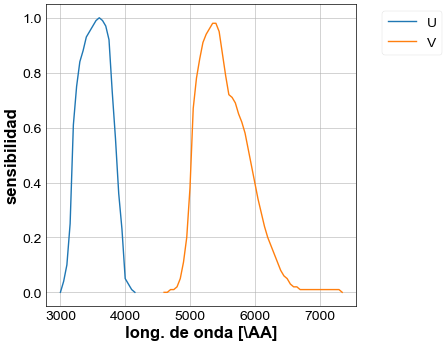

/home/juanpablo/materias/Astronomia-Estelar/.conda/envs/AEpracticas/lib/python3.7/site-packages/ipykernel_launcher.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


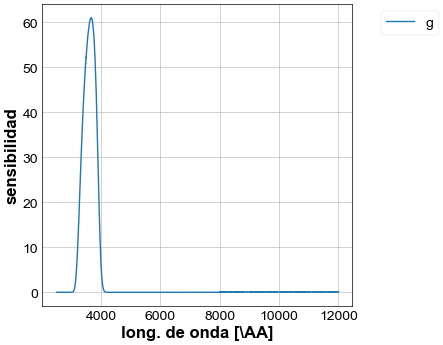

In [66]:
# Filtro los datos por color.
import matplotlib.pyplot as plt

dataU = data[data[0] == 'U'] # Filtro por banda.
dataB = data[data[0] == 'B'] # Filtro por banda.
dataV = data[data[0] == 'V'] # Filtro por banda.
#print(dataV[0]) % Sirve para comprobar si el filtrado funciono bien.

plt.plot( dataU[1], dataU[2], linewidth = 2 )
plt.plot( dataV[1], dataV[2], linewidth = 2 ) 

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.dpi'] = 50

plt.xlabel('long. de onda [\AA]')
plt.ylabel('sensibilidad')

plt.legend(labels = 'UV', bbox_to_anchor=(1.3,1), ncol = 1)
plt.show()

gmos_g = pd.read_csv('http://www.gemini.edu/sciops/instruments/gmos/filters/gmos_s_u_G0332_jun2017.txt', 
                     sep = "  ", comment = '#', header = None ) # le puse dos espacios de separacion
#print (gmos_g)

plt.plot( gmos_g[0] * 10., gmos_g[1], linewidth = 2 ) # Paso la long. de onda a \AA
plt.xlabel('long. de onda [\AA]')
plt.ylabel('sensibilidad')

plt.legend(labels = 'g', bbox_to_anchor=(1.3,1), ncol = 1)
plt.show()

In [3]:
## 1)
##
from scipy.integrate import simps
import numpy as np

from astropy.modeling.models import BlackBody
from astropy import units as u

LOE_numerador = simps(dataV[1]*dataV[2], x=dataV[1])
LOE_denominador = simps(dataV[2], x=dataV[1])

print ("Long. de onda media [\AA] = ", LOE_numerador/LOE_denominador)

bb = BlackBody(temperature=6000*u.K)
LOEQ_numerador = simps(dataV[1]*dataV[2]*bb(dataV[1]), x=dataV[1])
LOEQ_denominador = simps(dataV[2]*bb(dataV[1]), x=dataV[1])

print ("Long. de onda equivalente [\AA] = ", LOEQ_numerador/LOEQ_denominador)
# Que paso con el diferencial de long. de onda?


Long. de onda media [\AA] =  5535.781242639785
Long. de onda equivalente [\AA] =  5588.277416787293


In [67]:
## 2)
##
distribucion = pd.read_csv("distribucion_espectral_K5V.dat", sep = " ", comment = '#', header = None)
distribucion[0] = distribucion[0] * 10. # Para convertir la long. de onda de nm a AA.
# Hay alguna forma de hacer la conversion de unidades usando astropy?
print(distribucion)


# Calculo la magnitud en el filtro V:
## 2.1) Filtro la distribución de la fuente según la long. de onda
##       disponible en el archivo de sensibilidades.
min = dataV[1].min() # Calculo el minimo y máximo
max = dataV[1].max() #  de las long. de onda.
print ("[*] min y máx de la long. de onda (V) = ", min, max)

dist_filtrada = distribucion[(distribucion[0] >= min) & (distribucion[0] <= max)] # Filtro por banda.
##      Notar: el espaciado en de la sensibilidad y de la distribucion es la misma (50 AA),
##             por lo que no hay que hacer ninguna interpolación.
print (dist_filtrada)
print (dataV)

print (len(dist_filtrada), len(dataV)) # Tamaño de cada matriz.

dataV = dataV.reset_index(drop=True) # Vuelve a cero los indices.
dist_filtrada = dist_filtrada.reset_index(drop=True)

# if coinciden los len:
output = dist_filtrada.join(dataV, lsuffix='_caller', rsuffix='_other')
print(output)

V = -2.5 * np.log10( simps(output['1_caller']*output[2], x=output['0_caller']) )

           0     1
0     1200.0   0.0
1     1250.0   0.0
2     1300.0   0.0
3     1350.0   0.0
4     1400.0   0.0
..       ...   ...
183  10350.0  80.5
184  10400.0  81.2
185  10450.0  80.0
186  10500.0  78.5
187  12500.0  54.0

[188 rows x 2 columns]
[*] min y máx de la long. de onda (V) =  4600 7350
          0      1
68   4600.0   81.0
69   4650.0   82.0
70   4700.0   82.2
71   4750.0   79.0
72   4800.0   76.0
73   4850.0   79.5
74   4900.0   79.5
75   4950.0   78.0
76   5000.0   72.0
77   5050.0   66.5
78   5100.0   62.0
79   5150.0   60.5
80   5200.0   61.8
81   5250.0   77.0
82   5300.0   88.0
83   5350.0   92.0
84   5400.0   93.5
85   5450.0   96.5
86   5500.0  100.0
87   5550.0  104.0
88   5600.0  101.5
89   5650.0  108.0
90   5700.0  109.5
91   5750.0  112.0
92   5800.0  113.0
93   5850.0  112.0
94   5900.0  100.0
95   5950.0  116.0
96   6000.0  114.5
97   6050.0  117.5
98   6100.0  113.0
99   6150.0  109.5
100  6200.0  111.5
101  6250.0  109.0
102  6300.0  112.0
103  6350.0  

In [5]:
# Calculo la magnitud en el filtro B:
## 2.1) Filtro la distribución de la fuente según la long. de onda
##       disponible en el archivo de sensibilidades.
min = dataB[1].min() # Calculo el minimo y máximo
max = dataB[1].max() #  de las long. de onda.
print ("[*] min y máx de la long. de onda (B) = ", min, max)

dist_filtrada = distribucion[(distribucion[0] >= min) & (distribucion[0] <= max)] # Filtro por banda.
##      Notar: el espaciado en de la sensibilidad y de la distribucion es la misma (50 AA),
##             por lo que no hay que hacer ninguna interpolación.
#print (dist_filtrada)
#print (dataV)

#print (len(dist_filtrada), len(dataV)) # Tamaño de cada matriz.

dataB = dataB.reset_index(drop=True) # Vuelve a cero los indices.
dist_filtrada = dist_filtrada.reset_index(drop=True)

# if coinciden los len:
output = dist_filtrada.join(dataB, lsuffix='_caller', rsuffix='_other')
#print(output)

B = -2.5 * np.log10( simps(output['1_caller']*output[2], x=output['0_caller']) )


[*] min y máx de la long. de onda (B) =  3600 5550


In [6]:
# Calculo la magnitud en el filtro U:
## 2.1) Filtro la distribución de la fuente según la long. de onda
##       disponible en el archivo de sensibilidades.
min = dataU[1].min() # Calculo el minimo y máximo
max = dataU[1].max() #  de las long. de onda.
print ("[*] min y máx de la long. de onda (U) = ", min, max)

dist_filtrada = distribucion[(distribucion[0] >= min) & (distribucion[0] <= max)] # Filtro por banda.
##      Notar: el espaciado en de la sensibilidad y de la distribucion es la misma (50 AA),
##             por lo que no hay que hacer ninguna interpolación.
#print (dist_filtrada)
#print (dataV)

#print (len(dist_filtrada), len(dataV)) # Tamaño de cada matriz.

dataU = dataU.reset_index(drop=True) # Vuelve a cero los indices.
dist_filtrada = dist_filtrada.reset_index(drop=True)

# if coinciden los len:
output = dist_filtrada.join(dataU, lsuffix='_caller', rsuffix='_other')
#print(output)

U = -2.5 * np.log10( simps(output['1_caller']*output[2], x=output['0_caller']) )

[*] min y máx de la long. de onda (U) =  3000 4150


In [7]:
print ("[*] color instrumental (b-v) = ", B-V)

[*] color instrumental (b-v) =  0.5032222025718642


In [8]:
print ("[*] color instrumental (u-b) = ", U-B)

[*] color instrumental (u-b) =  2.0661077110272004



Bad key "axes.color_cycle" on line 215 in
/home/juanpablo/materias/Astronomia-Estelar/practicas/practica02/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


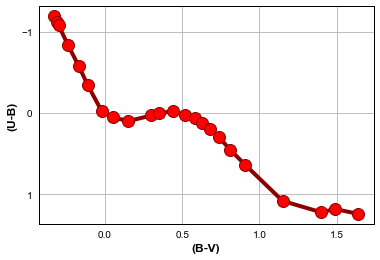

In [9]:
# 3) Diagrama color-color
import matplotlib.pyplot as plt

diagrama = pd.read_csv('V.dat', sep=" ", comment = '#')
#print(diagrama)

plt.plot( 'B-V', 'U-B', data = diagrama, 
         marker = 'o', markerfacecolor = 'red', markersize = 12, color = 'darkred', linewidth = 4 )
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.dpi'] = 50

plt.xlabel('(B-V)')
plt.ylabel('(U-B)')
plt.gca().invert_yaxis()
#plt.gca().set_aspect('equal')
plt.show()